In [1]:
from img_tools import *
from data_tools import *

In [2]:
trainData = unpickle('./cifar-10-batches-py/train_data.pickle')

In [3]:
testData = unpickle('./cifar-10-batches-py/test_data.pickle')

# pixel网络数据生成

In [4]:
def generate_mask():
    """
    随机生成一个掩膜
    返回值：
        （32,32）的numpy数组
    """
    mask_array = np.zeros((32,32,3),dtype='uint8')
    x1 = np.random.randint(32)
    x2 = np.random.randint(32)
    y1 = np.random.randint(32)
    y2 = np.random.randint(32)
    if x1 == x2 :
        mask_array[x1:,:]=1
    elif y1 == y2 :
        mask_array[:,y1:]=1
    else:
        for i in range(32):
            for j in range(32):
                if (j-y1)/(y1-y2)-(i-x1)/(x1-x2)>0:
                    mask_array[i,j]=1
    return mask_array

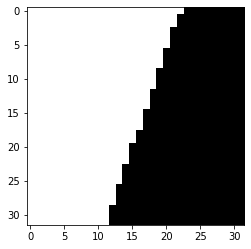

In [5]:
show_img(generate_mask())

In [6]:
def data_to_cvImg(img):
    img = img.reshape(3,32,32)
    img = np.transpose(img,(1,2,0))/255
    return img

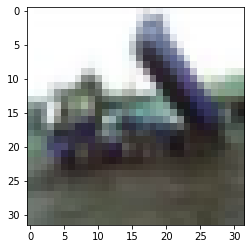

In [7]:
show_img(data_to_cvImg(trainData[2]))

In [8]:
print(generate_mask().shape)
print(trainData.shape[0])

(32, 32, 3)
50000


## 训练集

In [9]:
clearNumber = 0
blurNumber = 0
trainSet = []
for i in range(trainData.shape[0]):
    print('\r',i,end=' ')
    I = data_to_cvImg(trainData[i])
    
    # 1原图相
    save_img(I,'./data_set/pixel/train_set/1/'+str(clearNumber)+".jpg")
    trainSet.append([str(clearNumber),1])
    clearNumber += 1
    
    Ib = I
    for m in range(3):
        Ib = cv.GaussianBlur(Ib,(7,7),sigmaX = 2)
        save_img(Ib,'./data_set/pixel/train_set/0/'+str(blurNumber)+".jpg")
        trainSet.append([str(blurNumber),0])
        blurNumber += 1
        for j in range(5):
            mask = generate_mask()
            temp = np.multiply(mask,I)+np.multiply(1-mask,Ib)
            if mask[16,16,0] == 1:
                save_img(temp,'./data_set/pixel/train_set/1/'+str(clearNumber)+".jpg")
                trainSet.append([str(clearNumber),1])
                clearNumber += 1
            else:
                save_img(temp,'./data_set/pixel/train_set/0/'+str(blurNumber)+".jpg")
                trainSet.append([str(blurNumber),0])
                blurNumber += 1
                
save_data(trainSet,'./data_set/pixel/train_set.pickle')
del trainSet

 49999 499  5099  15244  22167   

## 测试集

In [10]:
clearNumber = 0
blurNumber = 0
testSet = []
for i in range(testData.shape[0]):
    print('\r',i,end='')
    I = data_to_cvImg(trainData[i])
    
    # 1原图相
    save_img(I,'./data_set/pixel/test_set/1/'+str(clearNumber)+".jpg")
    testSet.append([str(clearNumber),1])
    clearNumber += 1
    
    Ib = I
    for m in range(3):
        Ib = cv.GaussianBlur(Ib,(7,7),sigmaX = 2)
        save_img(Ib,'./data_set/pixel/test_set/0/'+str(blurNumber)+".jpg")
        testSet.append([str(blurNumber),0])
        blurNumber += 1
        for j in range(5):
            mask = generate_mask()
            temp = np.multiply(mask,I)+np.multiply(1-mask,Ib)
            if mask[16,16,0] == 1:
                save_img(temp,'./data_set/pixel/test_set/1/'+str(clearNumber)+".jpg")
                testSet.append([str(clearNumber),1])
                clearNumber += 1
            else:
                save_img(temp,'./data_set/pixel/test_set/0/'+str(blurNumber)+".jpg")
                testSet.append([str(blurNumber),0])
                blurNumber += 1
save_data(testSet,'./data_set/pixel/test_set.pickle')
del testSet

 9999

# block网络
## 训练集

In [11]:
clearNumber = 0
blurNumber = 0
trainSet = []
for i in range(trainData.shape[0]):
    print('\r',i,end=' ')
    I = data_to_cvImg(trainData[i])
    # 1原图相
    for j in range(6):
        h = np.random.randint(0,17)
        w = np.random.randint(0,17)
        save_img(I[h:h+16,w:w+16,:],'./data_set/block/train_set/1/'+str(clearNumber)+".jpg")
        trainSet.append([str(clearNumber),1])
        clearNumber += 1
        
    Ib = I
    for i in range(3):
        Ib = cv.GaussianBlur(Ib,(7,7),sigmaX = 2)
        for j in range(2):
            h = np.random.randint(0,17)
            w = np.random.randint(0,17)
            save_img(Ib[h:h+16,w:w+16,:],'./data_set/block/train_set/0/'+str(blurNumber)+".jpg")
            trainSet.append([str(blurNumber),0])
            blurNumber += 1
        
save_data(trainSet,'./data_set/block/train_set.pickle')
del trainSet

 49999 904 30668 

## 测试集

In [13]:
clearNumber = 0
blurNumber = 0
testSet = []
for i in range(testData.shape[0]):
    print('\r',i,end=' ')
    I = data_to_cvImg(testData[i])
    # 1原图相
    for j in range(6):
        h = np.random.randint(0,17)
        w = np.random.randint(0,17)
        save_img(I[h:h+16,w:w+16,:],'./data_set/block/test_set/1/'+str(clearNumber)+".jpg")
        testSet.append([str(clearNumber),1])
        clearNumber += 1
        
    Ib = I
    for i in range(3):
        Ib = cv.GaussianBlur(Ib,(7,7),sigmaX = 2)
        for j in range(2):
            h = np.random.randint(0,17)
            w = np.random.randint(0,17)
            save_img(Ib[h:h+16,w:w+16,:],'./data_set/block/test_set/0/'+str(blurNumber)+".jpg")
            testSet.append([str(blurNumber),0])
            blurNumber += 1
        
save_data(testSet,'./data_set/block/test_set.pickle')
del testSet

 9999 97 920 4527 